<a href="https://colab.research.google.com/github/aliftf/Exploration-of-Dengue-Hemorrhagic-Fever-Incidence-Rate-Data-2017/blob/main/Kelompok_9_Data_IR_DBD_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KELOMPOK 9**


Anggota Kelompok:
*   Alif Taufiqurrahman - 1302213011
*   Nabiel Prayoga Budiana - 1302210049
*   Deva Angela Felisitas Toding - 1302213111

![picture](https://drive.google.com/uc?export=view&id=1K571tlreU_l-2t_JgON_Di8wVZqScIBz)

**Source:** [Data DBD tahun 2020 Kementrian Kesehatan RI](https://https://p2pm.kemkes.go.id/storage/publikasi/media/file_1619447946.pdf)

\

**Dataset IR DBD 2017**

Data yang akan digunakan dalam simulasi ini adalah dataset IR DBD tahun 2017. Dataset IR DBD tahun 2017 adalah kumpulan data yang mencakup informasi tentang kasus Demam Berdarah Dengue (DBD) yang terjadi selama tahun 2017. Data ini mencakup beberapa variabel seperti Kecamatan, Jumlah Penduduk, Proporsi penduduk Laki, Curah Hujan, Suhu, Kelembapan, GoldarA, GoldarB, GoldarAB, GoldarO, Tamat SD, Tamat SMP, Tamat SMA, Tamat Kuliah, dan Insiden Rate (/100000 Penduduk)

Merujuk pada data pokok DBD oleh Kementrian Kesehatan Republik Indonesia, diketahui bahwa jumlah penderita DBD pada tahun 2017 adalah 68.407 jiwa, sedangkan IR (Incidence Rate) DBD per 100.000 penduduk adalah 26,10. Informasi lebih lengkap dapat dilihat [disini](https://p2pm.kemkes.go.id/storage/publikasi/media/file_1619447946.pdf).


Salah satu tujuan simulasi dataset ini adalah untuk menganalisis hubungan antar variabel dalam dataset.

**Library yang Digunakan**

1.   Pandas
2.   Numpy
3.   Matplotlib
4.   Plotly
5.   Random
6.   Seaborn
7.   Scipy

# **1. Inisiasi**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import linregress
from statsmodels.stats.weightstats import ztest
import random

In [ ]:
# Upload file to session storage before running

path="/content/9 Data IR DBD 2017.xlsx"
dataset = pd.read_excel(path)

# **2. Deskriptif Data**

In [ ]:
# !-- Statistics without scientific notation --!
pd.set_option('display.float_format', '{:.5f}'.format)

# Dataset descriptive statistics
describe = dataset.describe()

# Calculate mode for each numeric column and create a DataFrame
mode_describe = pd.DataFrame(dataset.mode(numeric_only=True).iloc[0]).transpose()
mode_describe.index = ['mode']

# Calculate variance for each numeric column and create a DataFrame
var_describe = pd.DataFrame(dataset.var(numeric_only=True)).transpose()
var_describe.index = ['var']

# Concatenate the original descriptive statistics with mode and variance DataFrames
describe = pd.concat([describe,mode_describe])
describe = pd.concat([describe,var_describe])

# Customize row value
describe.index = ['Count', 'Mean', 'Std', 'Min', 'Q1', 'Median', 'Q3', 'Max', 'Mode', 'Var']

# Display dataset descriptive statistics
describe

,Jumlah Penduduk,Proporsi Penduduk Laki,Curah Hujan,Suhu,Kelembaban,GoldarA,GoldarB,GoldarAB,GoldarO,Tamat SD,Tamat SMP,Tamat SMA,Tamat Kuliah,Insiden Rate (/100000 Penduduk)
Count,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000
Mean,80415.26667,0.50475,193.20000,23.50000,77.40000,10883.26667,7217.56667,3724.96667,12228.10000,10599.20000,11462.90000,25841.93333,37304.83333,77.81559
Std,30212.70613,0.00336,0.00000,0.00000,0.00000,4827.35073,2961.00504,1465.49884,4571.19705,6401.13461,5473.04260,9902.97822,14923.64657,45.39633
Min,24145.00000,0.49795,193.20000,23.50000,77.40000,1276.00000,1379.00000,749.00000,2537.00000,2552.00000,3528.00000,7897.00000,11612.00000,12.83048
Q1,67818.00000,0.50232,193.20000,23.50000,77.40000,7482.25000,4889.75000,2634.50000,8684.50000,6581.00000,7911.25000,20406.00000,29524.50000,36.95742
Median,77761.50000,0.50426,193.20000,23.50000,77.40000,10795.50000,7314.00000,3897.50000,13260.00000,9096.50000,10707.50000,23942.50000,35614.00000,79.90163
Q3,99525.25000,0.50641,193.20000,23.50000,77.40000,14774.75000,9197.50000,4848.00000,15145.75000,12319.50000,13921.75000,33807.75000,50353.00000,109.63342
Max,132497.00000,0.51188,193.20000,23.50000,77.40000,19330.00000,12978.00000,6484.00000,20282.00000,29951.00000,22868.00000,45778.00000,64103.00000,194.52236
Mode,24145.00000,0.49795,193.20000,23.50000,77.40000,1276.00000,1379.00000,749.00000,2537.00000,2552.00000,3528.00000,7897.00000,11612.00000,12.83048
Var,912807611.51264,0.00001,0.00000,0.00000,0.00000,23303315.09885,8767550.87471,2147686.86092,20895842.43793,40974524.30345,29954195.26552,98068977.58161,222715226.90230,2060.82669


**Analisis**


---

*   **Count** menunjukkan jumlah data yang tersedia untuk setiap variabel. Diketahui bahwa setiap variabel memiliki jumlah yang sama yaitu 30 sehingga setiap variabel memiliki data yang lengkap.

Berdasarkan tabel di atas, dapat disimpulkan:

1.   **Jumlah Penduduk**
*   Rata-rata jumlah penduduk adalah sekitar 80.415 orang dengan standar deviasi sekitar 30.213 orang. Maka, tidak semua kecamatan memiliki jumlah penduduk yang mendekati rata-rata 80.415 orang, ada yang jauh di atas atau di bawah rata-rata ini.
*   Jumlah penduduk berkisar antara 24.145 hingga 132.497 orang, dengan kebanyakan kecamatan memiliki populasi di sekitar median sekitar 77.762 orang.

2.   **Proporsi Penduduk Laki**
*   Proporsi penduduk laki-laki rata-rata sekitar 0,504 yang berarti sekitar 50,4% dari populasi di kecamatan ini adalah laki-laki.
*   Proporsi ini bervariasi tipis di antara kecamatan, dengan standar deviasi yang sangat kecil sekitar 0,003.

3.   **Curah Hujan, Suhu, dan Kelembaban**
*   Curah hujan, suhu, dan kelembaban memiliki nilai yang konstan untuk setiap statistik deskriptif (rata-rata, standar deviasi, minimum, Q1, median, Q3, maksimum, dan mode). Hal ini menunjukkan bahwa variabel-variabel ini mungkin tidak memiliki variasi dalam data Anda atau mungkin ada kesalahan dalam pengumpulan data.

4.   **Golongan Darah (GoldarA, GoldarB, GoldarAB, GoldarO)**
*   Setiap golongan darah memiliki rata-rata, median, dan modus yang berbeda, menunjukkan variasi dalam distribusi golongan darah di kecamatan.
*   Standar deviasi untuk setiap golongan darah menunjukkan variasi yang signifikan, yang mengindikasikan perbedaan besar dalam frekuensi golongan darah antar kecamatan.

5.   **Tingkat Pendidikan (Tamat SD, Tamat SMP, Tamat SMA, Tamat Kuliah)**
*   Terdapat variasi yang signifikan dalam rata-rata, median, dan modus untuk setiap tingkat pendidikan, menunjukkan perbedaan dalam tingkat pendidikan di antara kecamatan.
*   Standar deviasi yang cukup besar untuk beberapa tingkat pendidikan menunjukkan variasi yang signifikan dalam distribusi pendidikan.

6.   **Insiden Rate (/100000 Penduduk)**
*   Rata-rata insiden rate adalah sekitar 77,82 per 100.000 penduduk, dengan variasi yang signifikan antara kecamatan.
*   Standar deviasi yang cukup besar menunjukkan ada variasi yang signifikan dalam insiden DBD di antara kecamatan.














# **3. Visualisasi Data**

**3.1 Boxplot**

In [ ]:
# Exclude 'Kecamatan' column
columns_to_plot = dataset.columns[1:]

# Set number of rows and columns for subplots
plot_rows = 5
plot_cols = 3

# Create subplots
fig = make_subplots(rows=plot_rows, cols=plot_cols)

# Start with the first column to plot
x = 0

# Iterate in rows and columns
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):

        # Create Boxplot
        if x < len(columns_to_plot):
            fig.add_trace(go.Box(y=dataset[columns_to_plot[x]].values, name=columns_to_plot[x]), row=i, col=j)
            x += 1

# Adjust layout size
fig.update_layout(height=3000, width=1200)

# Format boxplot value
fig.update_yaxes(tickformat='.3f')

# Show the plots
fig.show()

**Analisis Boxplot**

---
**Skewness**

Positif skewed (atau sering disebut "right-skewed") dan negatif skewed (atau sering disebut "left-skewed") merujuk pada distribusi data dalam statistik dan bentuknya ketika direpresentasikan dalam boxplot.

 Berdasarkan hasil visualisasi data Boxplot, diketahui:

*   Distribusi data **jumlah penduduk** cenderung right (positif) skewed serta tidak ada pencilan pada data.

*   Distribusi data **proporsi penduduk laki** adalah simetris dan tidak ada pencilan pada data.

*   Data **curah hujan** memiliki distribusi yang sangat simetris. Tidak ada skewness yang jelas ke arah positif atau negatif. Karena tidak terdapat variasi pada data, maka whiskers tidak nampak.

*   Data **suhu** memiliki distribusi yang sangat simetris. Tidak ada skewness yang jelas ke arah positif atau negatif. Karena tidak terdapat variasi pada data, maka whiskers tidak nampak.

*   Data **kelembaban** memiliki distribusi yang sangat simetris. Tidak ada skewness yang jelas ke arah positif atau negatif. Karena tidak terdapat variasi pada data, maka whiskers tidak nampak.

*   Distribusi data pada **GoldarA** cenderung right skewed serta tidak terdapat pencilan.

*   Distribusi data pada **GoldarB** cenderung left (negative) skewed serta tidak terdapat pencilan.

*   Distribusi data pada **GoldarAB** cenderung left skewed serta tidak terdapat pencilan.

*   Distribusi data pada **GoldarO** cenderung left skewed serta tidak terdapat pencilan.

*   Distribusi data **Tamat SD** cenderung right skewed serta memiliki whiskers di sisi kanan yang lebih panjang yang menunjukkan data lebih tersebar di sisi kanan median. Terdapat juga pencilan di sisi kanan yang menunjukkan bahwa ada nilai yang secara signifikan berbeda atau ekstrem dibandingkan dengan mayoritas data lainnya.

*   Distribusi data **Tamat SMP** cenderung right skewed serta memiliki whiskers di sisi kanan yang lebih panjang yang menunjukkan data lebih tersebar di sisi kanan median. Tidak terdapat pencilan pada data.

*   Distribusi data **Tamat SMA** cenderung right skewed serta tidak ada pencilan pada data.

*   Distribusi data **Tamat Kuliah** cenderung right skewed serta memiliki whiskers di sisi kiri yang lebih panjang yang menunjukkan data lebih tersebar di sisi kiri median. Tidak terdapat pencilan pada data.

*   Distribusi data **Insiden Rate** cenderung left skewed serta memiliki whiskers di sisi kanan yang lebih panjang yang menunjukkan data lebih tersebar di sisi kanan median. Tidak terdapat pencilan pada data. Hal ini menandakan bahwa sebagian besar area atau populasi memiliki tingkat insiden yang relatif rendah, namun ada beberapa area atau kejadian dengan tingkat insiden yang lebih tinggi.

**Kesimpulan:** Mayoritas data dari dataset IR DBD 2017 menunjukkan kecenderungan positif skewed, terutama dalam konteks populasi, pendidikan, dan insiden. Namun, ada beberapa variabel seperti faktor lingkungan dan beberapa golongan darah yang menunjukkan distribusi yang lebih merata atau cenderung ke arah negative skewed.

\

**Median**
\
Median adalah titik tengah dari data ketika disusun dalam urutan yang meningkat atau menurun. Oleh karena itu, median memberikan indikasi tentang pusat sebaran data. Dengan membandingkan median dari masing-masing variabel maka dapat diketahui distribusi relatif dari data dalam setiap variabel.

\
Berdasarkan visualisasi boxplot di atas, diketahui bahwa median adalah sebagai berikut:

*   **Jumlah Penduduk** memiliki median **77.761,5**

*   **Proporsi Penduduk Laki** memiliki median **0,504**

*   **Curah hujan** memiliki angka yang sama. Maka Q1, median, dan Q3 memiliki nilai yang sama yaitu **193,2**

*   **Suhu** memiliki angka yang sama. Maka Q1, median, dan Q3 memiliki nilai yang sama yaitu **23,5**

*   **Kelembaban** memiliki angka yang sama. Maka Q1, median, dan Q3 memiliki nilai yang sama yaitu **77,4**

*   **GoldarA** memiliki median **10.795,5**. Ini menunjukkan bahwa nilai tengah dari data distribusi GoldarA adalah yang menunjukkan bahwa meskipun tidak sekuat GoldarA, GoldarO masih memiliki median yang signifikan.

*   **GoldarB** memiliki median **7.314**, menunjukkan bahwa data cenderung lebih rendah dibandingkan dengan GoldarA dan GoldarO.

*   **GoldarAB** memiliki median **3.897,5**, yang menunjukkan bahwa distribusi data untuk GoldarAB adalah yang paling rendah di antara empat golongan darah.

*   **GoldarO** memiliki median **13.260**, yang merupakan kedua tertinggi dibandingkan golongan darah lainnya, yang paling tinggi dibandingkan dengan golongan darah lainnya.

*   **Tamat SD** memiliki median **9.096,5** yang merupakan median terendah pada tingkat pendidikan

*   **Tamat SMP** memiliki median **10.707,5**

*   **Tamat SMA** memiliki median **23.942,5**

*   **Tamat Kuliah** memiliki median **35.614** yang merupakan median tertinggi pada tingkat pendidikan.

*   **Insiden Rate** memiliki median **79.902**

**Kesimpulan:** Insiden rate memiliki median tertinggi yaitu **79.902** dan proporsi penduduk laki memiliki median terendah yaitu **0,504**.

\

**3.2 Histogram**

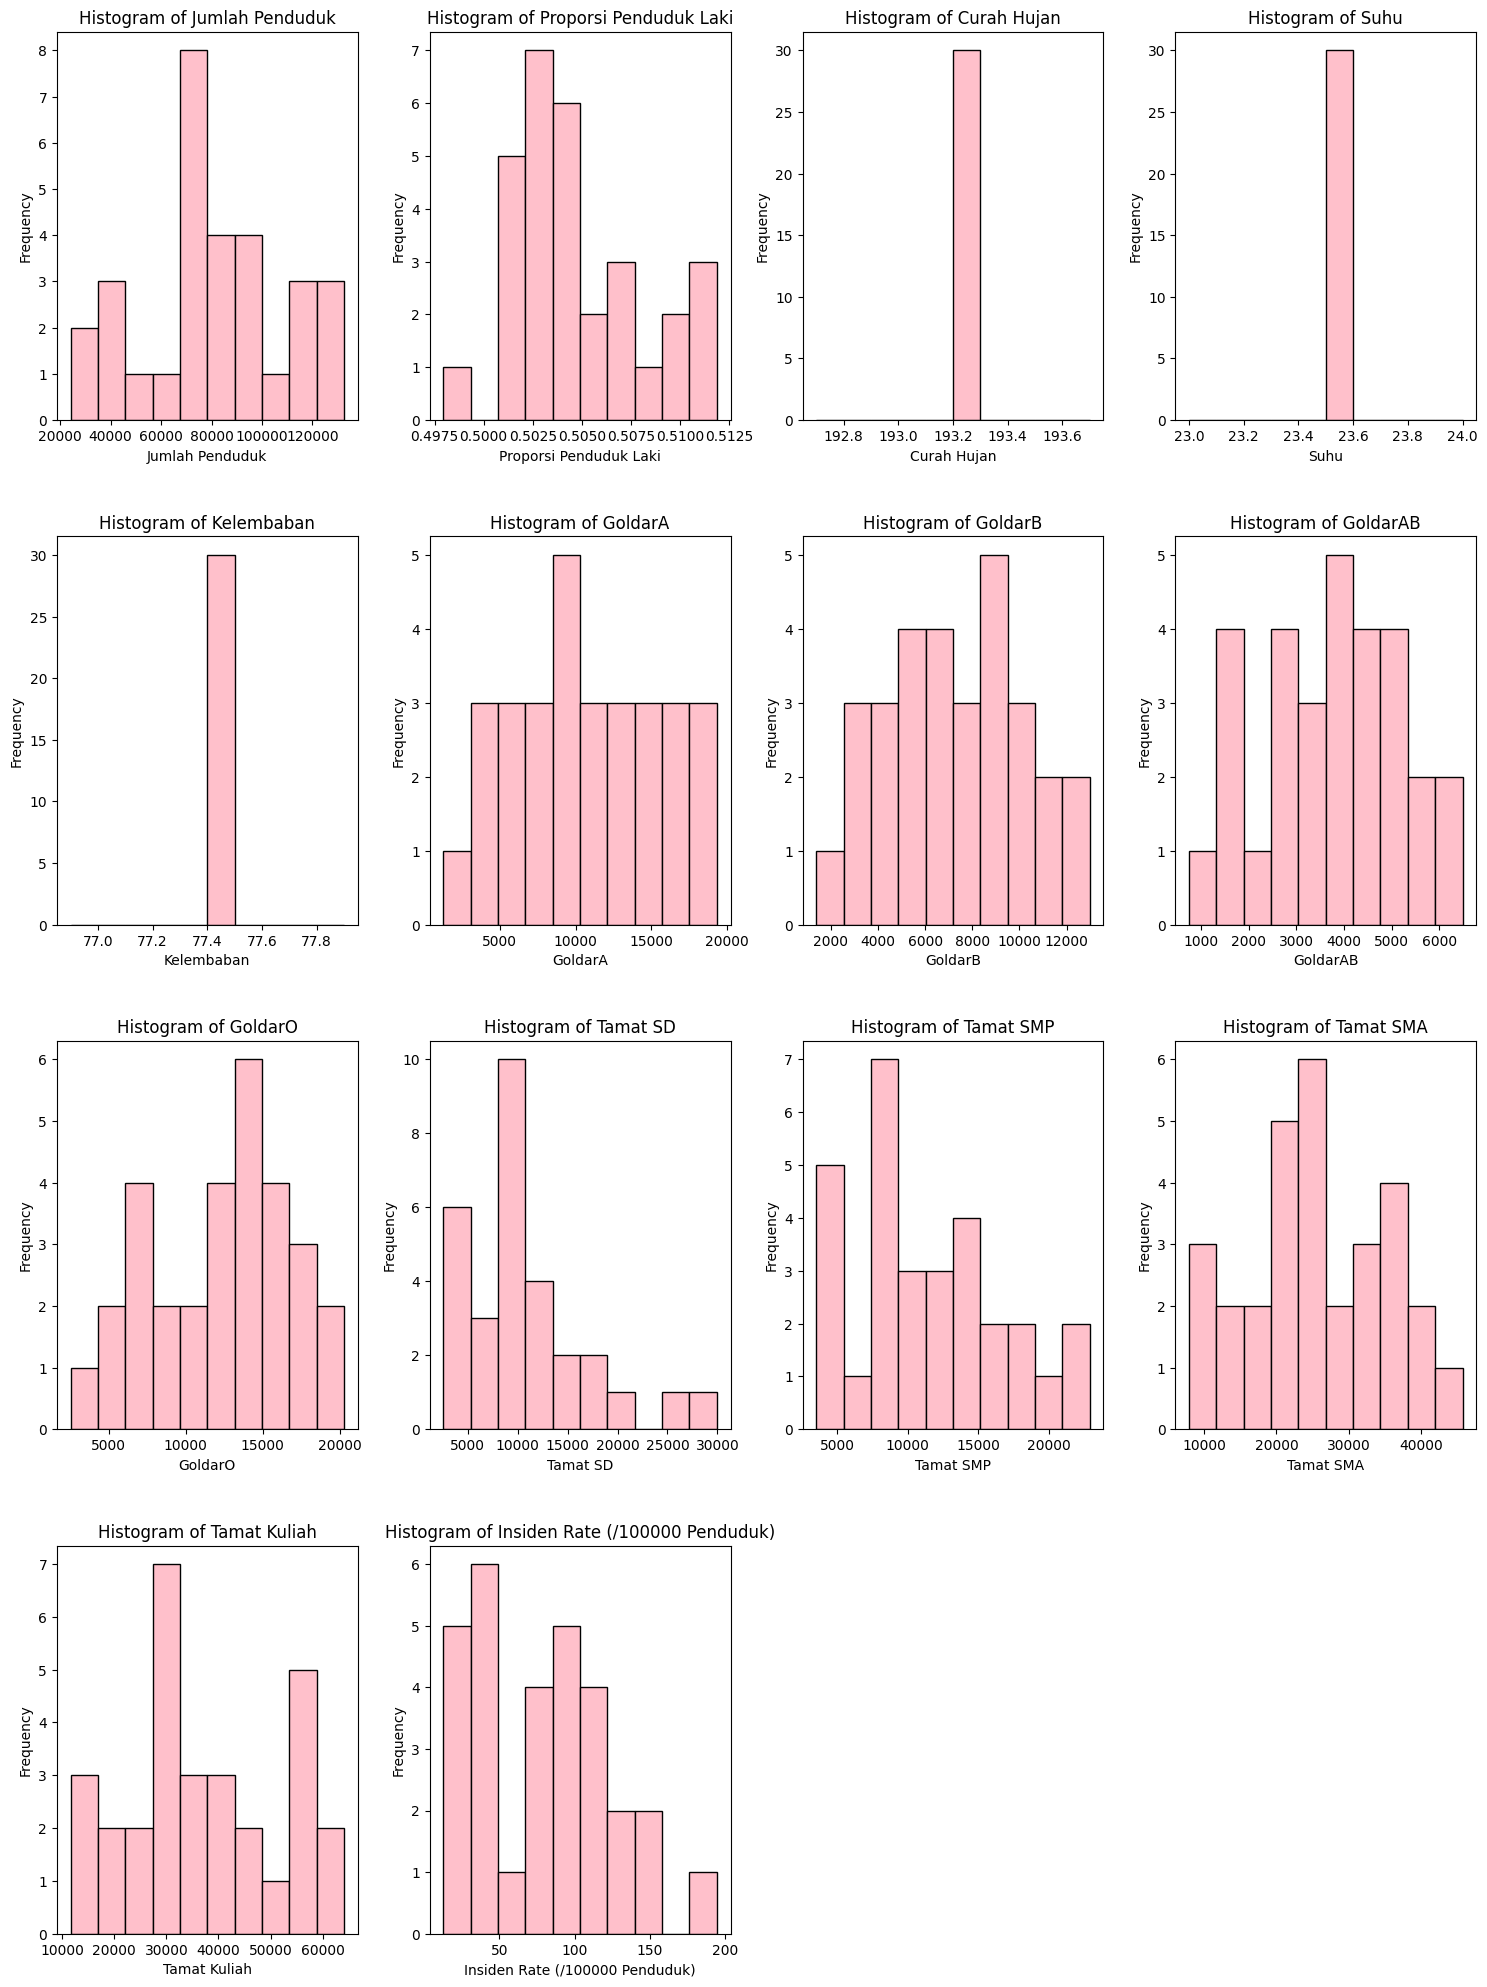

In [ ]:
# Set the number of columns for subplots
num_columns = len(dataset.columns) - 1  # Exclude 'Kecamatan'

# Adjust figure size based on the number of subplots
plt.figure(figsize=(15, 5 * num_columns))

# Iterate through each column
for i, column in enumerate(dataset.columns[1:]):
    if column != 'Kecamatan':

        # Create subplots for histograms
        plt.subplot(num_columns, 4, i + 1)

        # Histogram
        plt.hist(dataset[column], bins=10, color='pink', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

# Adjust layout parameters for spacing between subplots
plt.tight_layout()

# Adjust gap between rows
plt.subplots_adjust(hspace=0.3)

# Show the plots
plt.show()

**Analisis Histogram**


---



- Berdasarkan dari histogram jumlah penduduk menunjukan pada nilai dari histogram cenderung lebih besar nilai mean(80.415.267) dari median(77.761.500) dan mode(24.145.00), yang berarti arah dari gambar kemiringannya ke arah kanan menandakan bahwa condong positif.

- Berdasarkan dari histogram Proporsi Penduduk laki laki menunjukan pada nilai dari histogram cenderung lebih besar nilai mean(0.505) dari median(0.504) dan mode(0.498), yang berarti arah dari gambar kemiringannya ke arah kanan menandakan bahwa condong positif.

- Pada histogram Curah hujan dapat didefinisikan bahwa data yang ada pada curah hujan memiliki nilai yang sama sehingga hanya memiliki 1 diagram dengan kemiringan data simetris.

- Pada histogram Suhu dapat didefinisikan bahwa data yang ada pada Suhu memiliki nilai yang sama sehingga hanya memiliki 1 diagram dengan kemiringan data simetris.

- Pada histogram Kelembaban dapat didefinisikan bahwa data yang ada pada kelembaban memiliki nilai yang sama sehingga hanya memiliki 1 diagram dengan kemiringan data simetris.

- Berdasarkan dari histogram Golongan Darah A menunjukan pada nilai dari histogram cenderung lebih besar nilai mean(10.883.267) dari median(10.795.500) dan mode(1.276.00), yang berarti arah dari gambar kemiringannya ke arah kanan menandakan bahwa condong positif.

- Berdasarkan dari histogram Golongan Darah B menunjukan pada nilai dari histogram cenderung lebih besar nilai median(7.314.00) dari mean(7.217.567) dan lebih kecil mode(1.379.000), yang berarti arah dari gambar kemiringannya ke arah kiri menandakan bahwa condong negatif.

- Berdasarkan dari histogram Golongan Darah AB menunjukan pada nilai dari histogram cenderung lebih besar nilai median(3.897.500) dari mean(3.724.967) dan lebih kecil mode(749.000), yang berarti arah dari gambar kemiringannya ke arah kiri menandakan bahwa condong negatif.

- Berdasarkan dari histogram Golongan Darah O menunjukan pada nilai dari histogram cenderung lebih besar nilai median(13.260.000) dari mean(12.228.100) dan lebih kecil mode(2.537.000), yang berarti arah dari gambar kemiringannya ke arah kiri menandakan bahwa condong negatif.

- Berdasarkan dari histogram Tamat SD menunjukan pada nilai dari histogram cenderung lebih besar nilai mean(10.599.200) dari median(9.096.500) dan mode(2.552.000), yang berarti arah dari gambar kemiringannya ke arah kanan menandakan bahwa condong positif.

- Berdasarkan dari histogram Tamat SMP menunjukan pada nilai dari histogram cenderung lebih besar nilai mean(11.462.900) dari median(10.707.500) dan mode(3.528.000), yang berarti arah dari gambar kemiringannya ke arah kanan menandakan bahwa condong positif.

- Berdasarkan dari histogram Tamat SMA menunjukan pada nilai dari histogram cenderung lebih besar nilai mean(25.841.933) dari median(23.942.500) dan mode(7.897.000), yang berarti arah dari gambar kemiringannya ke arah kanan menandakan bahwa condong positif.

- Berdasarkan dari histogram Tamat Kuliah menunjukan pada nilai dari histogram cenderung lebih besar nilai mean(37.304.833) dari median(35.61.000) dan mode(11.612.000), yang berarti arah dari gambar kemiringannya ke arah kanan4 menandakan bahwa condong positif.

- Berdasarkan dari histogram Insiden Rate menunjukan pada nilai dari histogram cenderung lebih besar nilai median(79.902) dari mean(77.816) dan lebih kecil mode(12.830), yang berarti arah dari gambar kemiringannya ke arah kiri menandakan bahwa condong negatif.


\


**3.3 Tabel Dua Dimensi**

In [ ]:
# Selecting the columns of interest
selected_columns = ['Kecamatan', 'Tamat SD', 'Tamat SMP', 'Tamat SMA', 'Tamat Kuliah']

# Creating a MultiIndex for the columns
column_levels = [('Tingkat Pendidikan', col) for col in selected_columns[1:]]  # Exclude 'Kecamatan'
multi_columns = pd.MultiIndex.from_tuples(column_levels)

# Creating the new DataFrame with the MultiIndex columns (excluding 'Kecamatan')
new_dataframe = pd.DataFrame(dataset[selected_columns[1:]].values, columns=multi_columns)

# Adding 'Kecamatan' as a separate column
new_dataframe.insert(0, ('Kecamatan', ''), dataset['Kecamatan'])

# Displaying the new DataFrame
new_dataframe.set_index('Kecamatan')

Tingkat Pendidikan                                 
                           Tamat SD Tamat SMP Tamat SMA Tamat Kuliah
Kecamatan                                                           
Andir                         12323     15999     35744        51743
Antapani                       6154      7912     22661        30573
Arcamanik                      8127      9045     20255        29300
Astana Anyar                   8677     11508     26368        37876
Babakan Ciparay               29951     22756     34170        56926
Bandung Kidul                  6878      7911     17765        25676
Bandung Kulon                 25210     22868     34487        57355
Bandung Wetan                  2552      3528     10347        13875
Batununggal                   14165     18673     41700        60373
Bojongloa Kaler               20749     20695     37324        58019
Bojongloa Kidul               16326     13368     23471        36839
Buahbatu                      10577     11780     28917        40697
Cibeunying Kaler               6482      8106     24349        32455
Cibeunying Kidul              12123     16200     37878        54078
Cibiru                        10493     11001     23388        34389
Cicendo                       11644     13456     32721        46177
Cidadap                        8490      6411     17348        23759
Cinambo                        3197      3715      7897        11612
Coblong                       12309     13879     40174        54053
Gedebage                       4020      5274      9817        15091
Kiaracondong                  16713     18325     45778        64103
Lengkong                       5039      7900     23536        31436
Mandalajati                    9249     10414     20859        31273
Panyileukan                    2893      4367     12713        17080
Rancasari                      8268      9301     23034        32335
Regol                          8122     10009     29148        39157
Sukajadi                      14596     13936     32247        46183
Sukasari                       8944      8148     22050        30198
Sumur Bandung                  3183      4369     14734        19103
Ujung Berung                  10522     13033     24378        37411

**Analisis Tabel Dua Dimensi**


---

Pada Tabel Dua Dimensi diatas dapat didefinisikan hubungan antara tingkat pendidikan dengan kecamatan. Dari hubungan tersebut bisa didapatkan Jumlah kelulusan dengan membandingkan setiap variasi data pada kolom data kecamatan dengan Tamat SD, Tamat SMP, Tamat SMA, Tamat Kuliah.


**3.4 Heatmap**

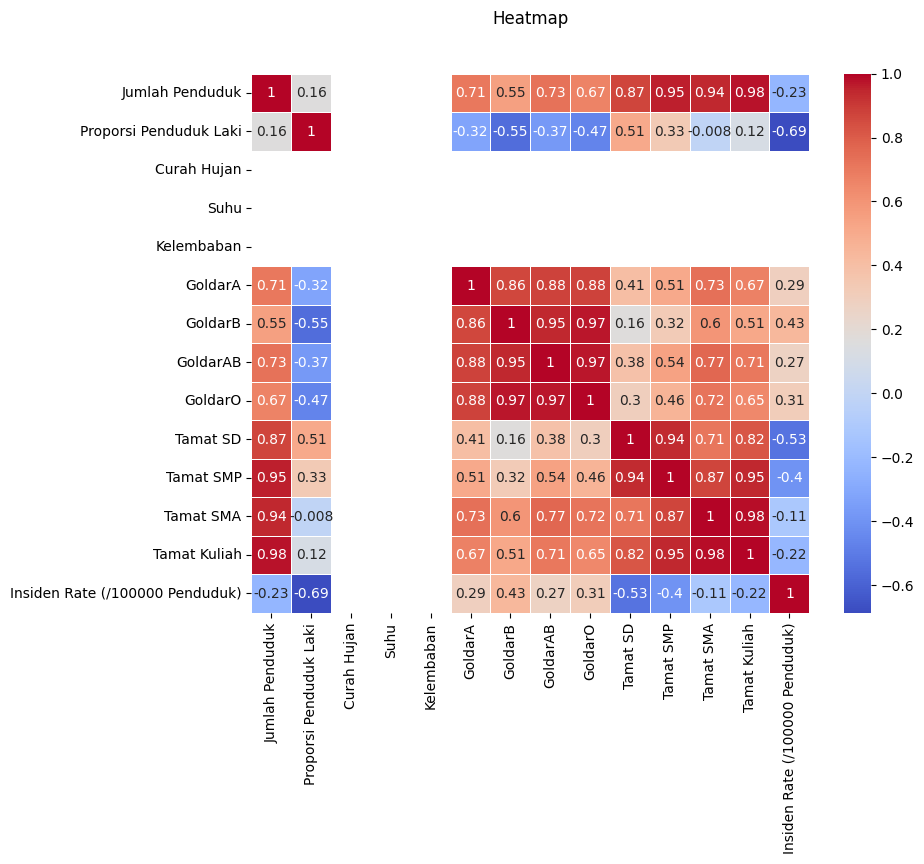

In [ ]:
# Exclude non-numeric columns
heatmap_data = dataset.drop(columns=['Kecamatan'])

# Set up the figure and axes
plt.figure(figsize=(9,7))

# Create a heatmap using seaborn
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)

# Set plot title
plt.title('Heatmap\n\n')

# Show the plot
plt.show()

**Analisis Heatmap**


---


Pada heatmap ketika ada hubungan yang signifikan antar variabel, nilai yang mendekati 1 atau -1 mengindikasikan korelasi yang kuat, sedangkan nilai yang mendekati 0 mengindikasikan korelasi yang lemah.

Berdasarkan visualisasi di atas, angka-angka dengan korelasi positif kuat (mendekati 1) ditandai dengan warna merah, sementara korelasi negatif kuat (mendekati -1) ditandai dengan warna biru.

\
**Hasil dari visualisasi data di atas adalah sebagai berikut:**

*   Proporsi penduduk laki-laki memiliki korelasi negatif yang kuat dengan insiden rate. Korelasi ini menunjukan bahwa saat proporsi penduduk laki-laki di suatu area atau wilayah meningkat, insiden rate DBD cenderung menurun. Ini berarti wilayah dengan proporsi penduduk laki-laki yang lebih tinggi memiliki kemungkinan insiden DBD yang lebih rendah dibandingkan dengan wilayah yang proporsi penduduk laki-lakinya lebih rendah.
*   Insiden rate memiliki korelasi positif yang lemah dengan golongan darah (GoldarA, GoldarB, GoldarAB, GoldarO). Jika nilai IR meningkat maka nilai Goldar pun meningkat. Namun, diketahui bahwa GoldarB memiliki nilai yang lebih tinggi dibanding yang lainnya, sehingga berdasarkan korelasi ini, dapat disimpulkan bahwa individu dengan GoldarB cenderung memiliki IR DBD yang tinggi.
*   Korelasi antara insiden rate dengan jumlah penduduk adalah -0,23 yakni korelasi negatif lemah. Maka ketika jumlah penduduk suatu area meningkat, insiden rate DBD cenderung menurun sedikit, dan sebaliknya.


\





# **4. Scatter Plot dan Korelasi**

**Pair Scatter Plot**

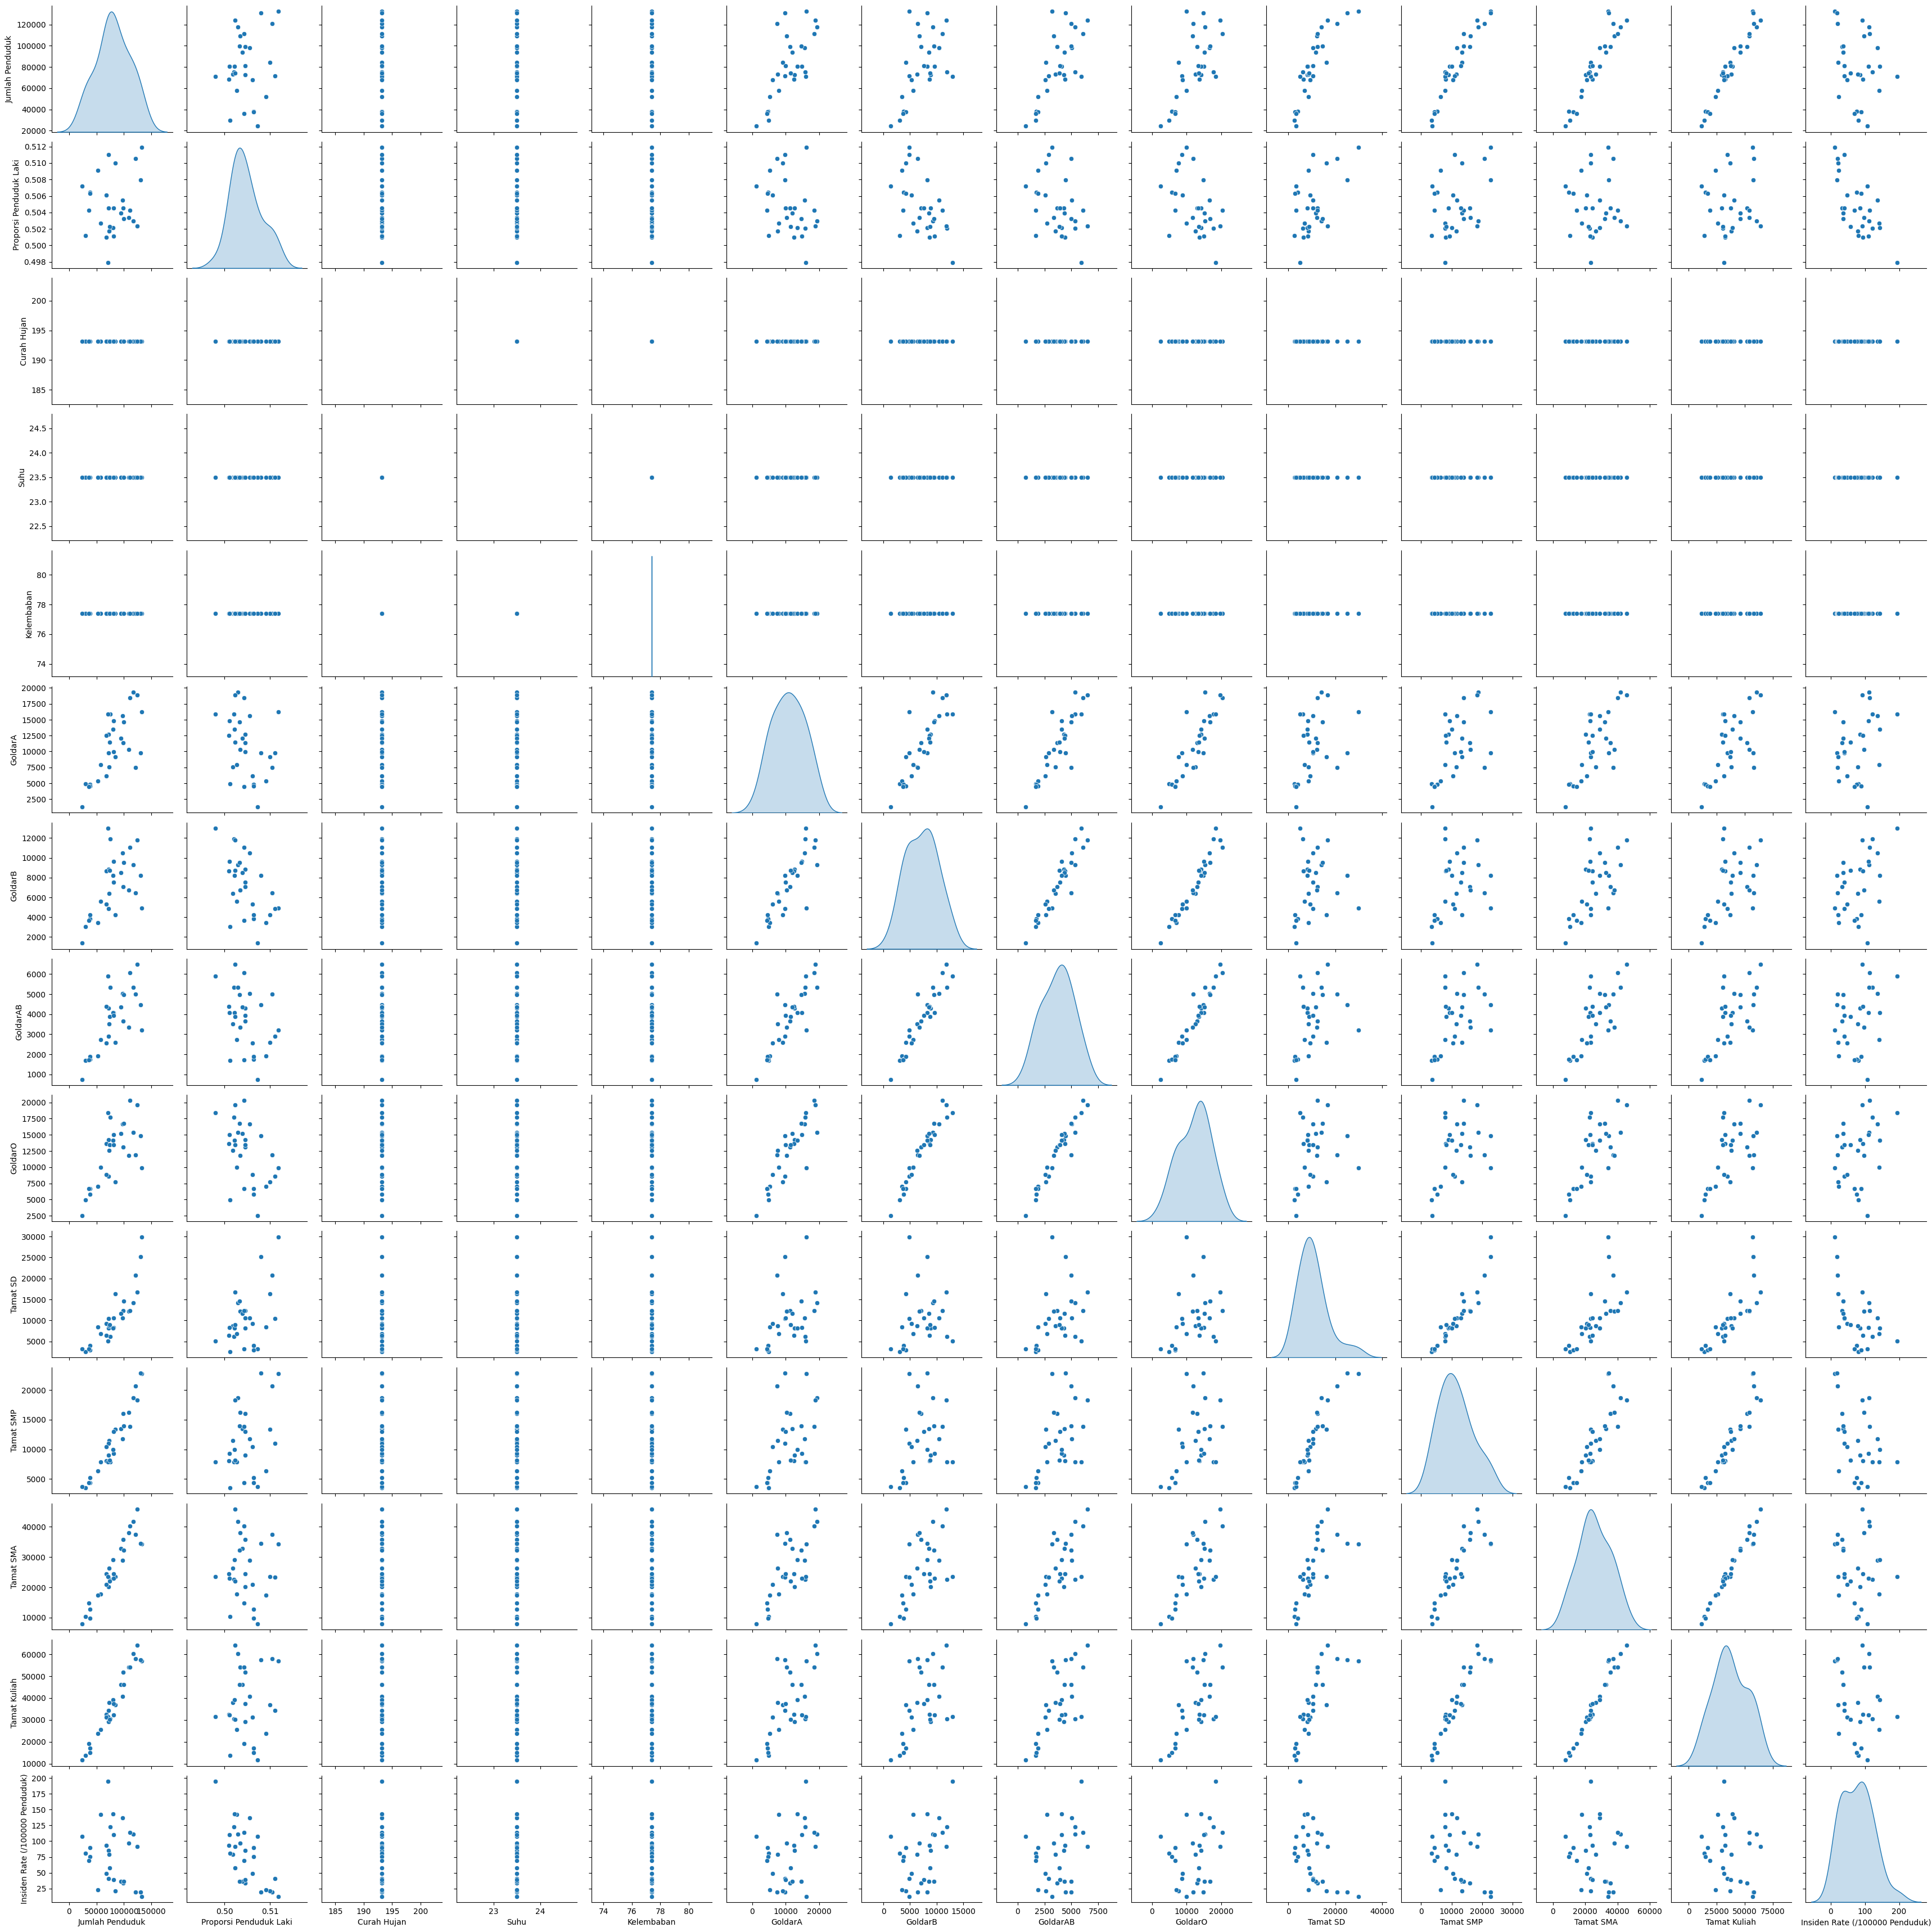

In [ ]:
sns.pairplot(dataset, diag_kind='kde')

- Dilihat dari scatter plot pada jumlah penduduk menunjukan bahwa Tamat SD, Tamat SMP, Tamat SMA dan Tamat Kuliah memiliki korelasi mendekati 1 atau -1 yang menandakan bahwa hubungan jumlah penduduk dengan rate tersebut dekat.

- Dilihat dari scatter plot pada proporsi penduduk laki laki menunjukan bahwa tidak ada data yang memiliki korelasi mendekati 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Dilihat dari scatter plot pada curah hujan tidak memilki korelasi (korelasi = 0) yang menandakan bahwa tidak ada hubungan antara curah hujan dengan rate tersebut.

- Dilihat dari scatter plot pada Suhu tidak memilki korelasi (korelasi = 0) yang menandakan bahwa tidak ada hubungan antara Suhu dengan rate tersebut.

- Dilihat dari scatter plot pada kelembabab tidak memilki korelasi (korelasi = 0) yang menandakan bahwa tidak ada hubungan antara kelembaban dengan rate tersebut.

- Dilihat dari scatter plot pada proporsi GoldarA menunjukan bahwa Jumlah penduduk, GoldarB, GoldarAB, GoldarO memiliki korelasi mendekati 1 atau -1 yang menandakan bahwa hubungan jumlah penduduk dengan rate tersebut dekat.

- Dilihat dari scatter plot pada proporsi GoldarB menunjukan bahwa GoldarA, GoldarAB, GoldarO memiliki korelasi mendekati 1 atau -1 yang menandakan bahwa hubungan jumlah penduduk dengan rate tersebut dekat.

- Dilihat dari scatter plot pada proporsi GoldarAB menunjukan bahwa Jumlah penduduk, GoldarB, GoldarO, Tamat SD memiliki korelasi mendekati 1 atau -1 yang menandakan bahwa hubungan jumlah penduduk dengan rate tersebut dekat.

- Dilihat dari scatter plot pada proporsi GoldarO menunjukan bahwa GoldarA, GoldarB, GoldarAB memiliki korelasi mendekati 1 atau -1 yang menandakan bahwa hubungan jumlah penduduk dengan rate tersebut dekat.

- Dilihat dari scatter plot pada proporsi Tamat SD menunjukan bahwa Jumlah Penduduk, Tamat SMP, Tamat SMA, Tamat Kuliah, dan insiden rate memiliki korelasi mendekati 1 atau -1 yang menandakan bahwa hubungan jumlah penduduk dengan rate tersebut dekat.

- Dilihat dari scatter plot pada proporsi Tamat SMP menunjukan bahwa Jumlah penduduk, Tamat SD, Tamat SMA, Tamat Kuliah memiliki korelasi mendekati 1 atau -1 yang menandakan bahwa hubungan jumlah penduduk dengan rate tersebut dekat.

- Dilihat dari scatter plot pada proporsi Tamat SMA menunjukan bahwa Jumlah penduduk, Tamat SD, Tamat SMP, Tamat Kuliah memiliki korelasi mendekati 1 atau -1 yang menandakan bahwa hubungan jumlah penduduk dengan rate tersebut dekat.

- Dilihat dari scatter plot pada proporsi Tamat Kuliah menunjukan bahwa Jumlah penduduk, Tamat SD, Tamat SMP, Tamat SMA memiliki korelasi mendekati 1 atau -1 yang menandakan bahwa hubungan jumlah penduduk dengan rate tersebut dekat.

- Dilihat dari scatter plot pada Insiden Rate menunjukan bahwa tidak ada data yang memiliki korelasi mendekati 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.








**Scatter Plot of 'Insiden Rate' With Each Dataset Columns**

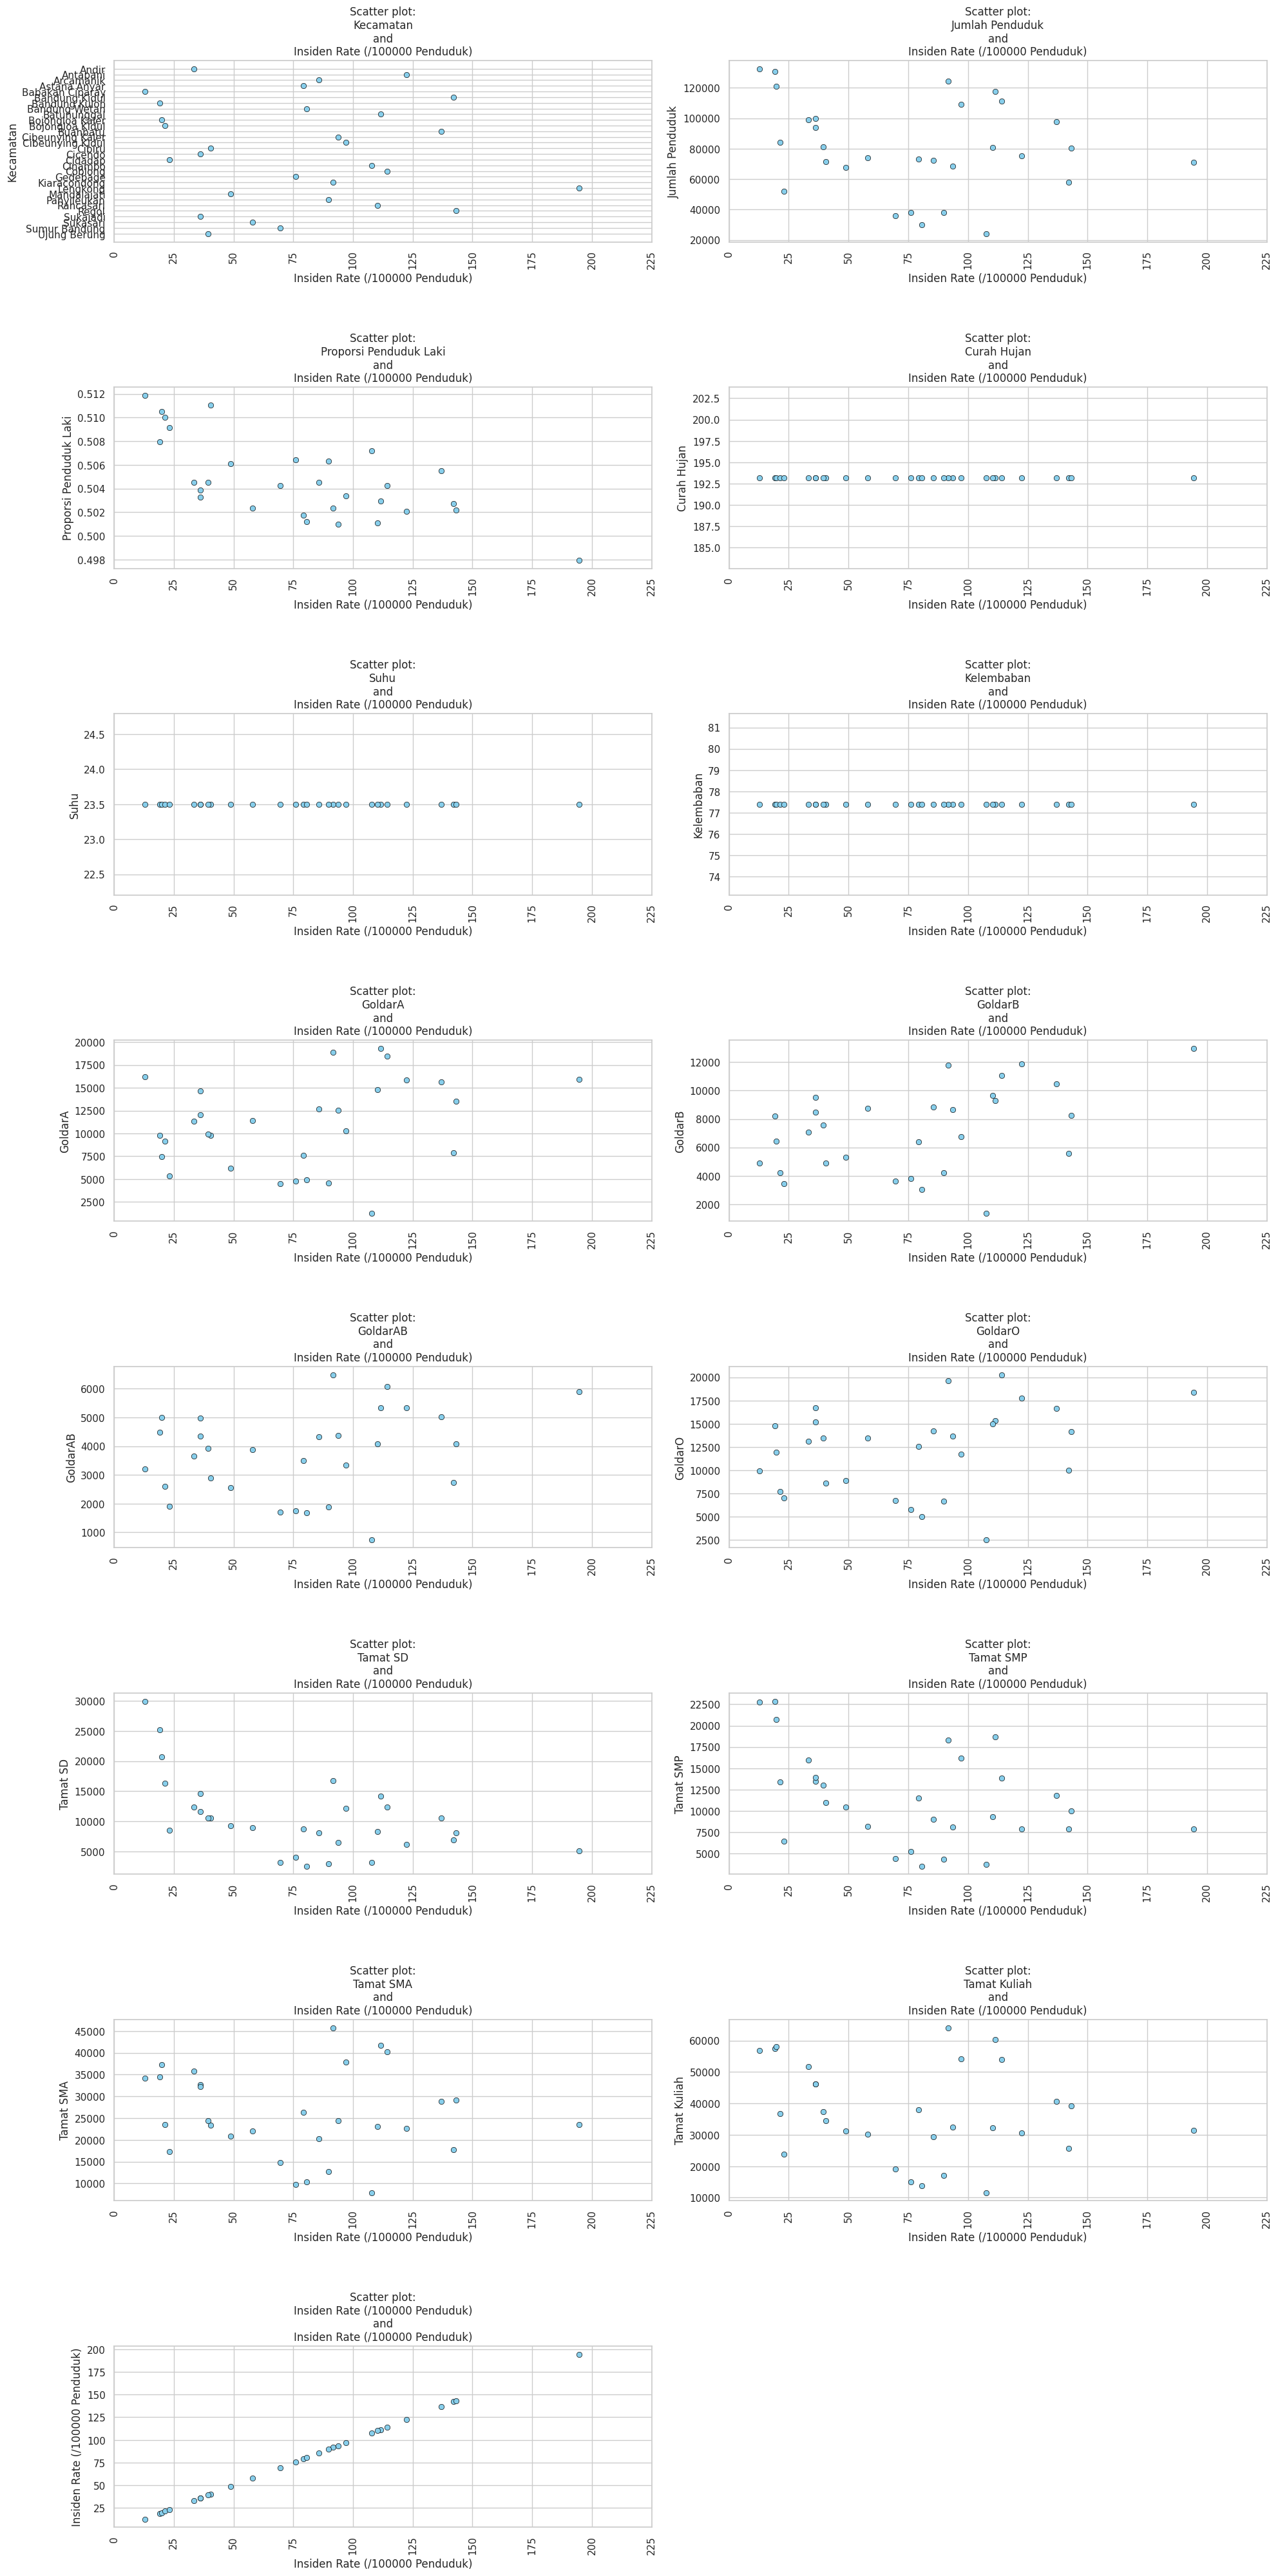

In [ ]:
# Set the number of columns for subplots
num_columns = len(dataset.columns)

# Adjust figure size based on the number of subplots
plt.figure(figsize=(20, 5 * num_columns))

# Set the style for seaborn
sns.set(style="whitegrid")

# Iterate through each column
for i, column in enumerate(dataset.columns):
      # Create subplots
      plt.subplot(num_columns, 2, i + 1)

      # Scatter plot
      scatter_plot = sns.scatterplot(x='Insiden Rate (/100000 Penduduk)', y=column, data=dataset, color='skyblue', edgecolor='black')

      # Rotate x-axis labels to be vertical
      scatter_plot.set_xticks(scatter_plot.get_xticks())
      scatter_plot.set_xticklabels(scatter_plot.get_xticklabels(), rotation=90)

      # Set title and labels
      plt.title(f'Scatter plot:\n{column}\nand\nInsiden Rate (/100000 Penduduk)')
      plt.xlabel('Insiden Rate (/100000 Penduduk)')
      plt.ylabel(column)

# Adjust layout parameters for spacing between subplots
plt.tight_layout()

# Adjust gap between rows
plt.subplots_adjust(hspace=0.8)

# Show the plots
plt.show()


- Hubungan antara Kecamatan dan Insiden rate dilihat dari scatter plot menunjukan bahwa tidak ada data yang memiliki korelasi mendekati antara 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Hubungan antara jumlah penduduk dan Insiden rate dilihat dari scatter plot menunjukan bahwa tidak ada data yang memiliki korelasi mendekati antara 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Hubungan antara Proporsi penduduk laki laki dan Insiden rate dilihat dari scatter plot menunjukan bahwa tidak ada data yang memiliki korelasi mendekati antara 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Hubungan antara Curah hujan dan Insiden rate dilihat dari scatter plot tidak memilki korelasi (korelasi = 0) yang menandakan bahwa tidak ada hubungan antara curah hujan dengan rate tersebut.

- Hubungan antara Suhu dan Insiden rate dilihat dari scatter plot tidak memilki korelasi (korelasi = 0) yang menandakan bahwa tidak ada hubungan antara curah hujan dengan rate tersebut.

- Hubungan antara Kelembaban dan Insiden rate dilihat dari scatter plot pada curah hujan tidak memilki korelasi (korelasi = 0) yang menandakan bahwa tidak ada hubungan antara curah hujan dengan rate tersebut.

- Hubungan antara GoldarA laki laki dan Insiden rate dilihat dari scatter plot menunjukan bahwa tidak ada data yang memiliki korelasi mendekati antara 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Hubungan antara GoldarB dan Insiden rate dilihat dari scatter plot menunjukan bahwa tidak ada data yang memiliki korelasi mendekati antara 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Hubungan antara GoldarAB dan Insiden rate dilihat dari scatter plot menunjukan bahwa tidak ada data yang memiliki korelasi mendekati antara 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Hubungan antara GoldarO dan Insiden rate dilihat dari scatter plot menunjukan bahwa tidak ada data yang memiliki korelasi mendekati antara 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Hubungan antara Tamat SD dan Insiden rate dilihat dari scatter plot menunjukan bahwa tidak ada data yang memiliki korelasi mendekati antara 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Hubungan antara Tamat SMP dan Insiden rate dilihat dari scatter plot menunjukan bahwa tidak ada data yang memiliki korelasi mendekati antara 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Hubungan antara Tamat SMA dan Insiden rate dilihat dari scatter plot menunjukan bahwa tidak ada data yang memiliki korelasi mendekati antara 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Hubungan antara Tamat Kuliah dan Insiden rate dilihat dari scatter plot menunjukan bahwa tidak ada data yang memiliki korelasi mendekati antara 1 atau -1 yang menandakan bahwa data tersebut memiliki korelasi lemah.

- Hubungan antara Insiden rate dan Insiden rate dilihat dari scatter plot menunjukan bahwa pada data tersebut terlihat variabelnya naik sehingga data tersebut korelasi positif meningkat.






# **5. Regresi Linier**

Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'Jumlah Penduduk'



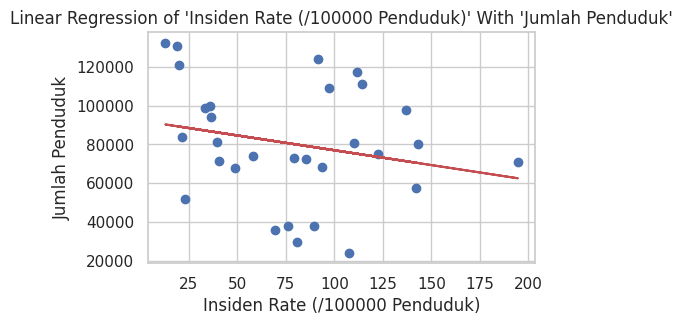



Korelasi (r): -0.23
Keragaman (r^2): 0.05
Persamaan regresi: y = 92298.86 + -152.71 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'Proporsi Penduduk Laki'



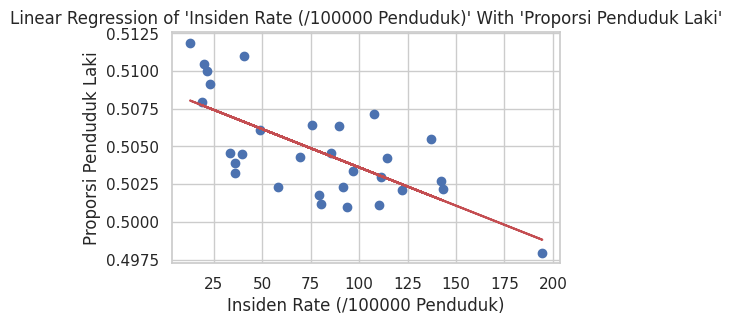



Korelasi (r): -0.69
Keragaman (r^2): 0.47
Persamaan regresi: y = 0.51 + -0.00 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'Curah Hujan'



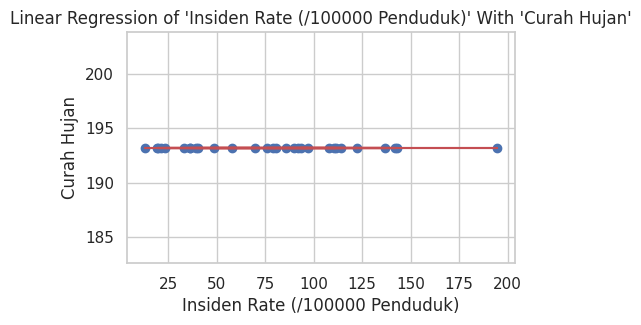



Korelasi (r): 0.00
Keragaman (r^2): 0.00
Persamaan regresi: y = 193.20 + 0.00 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'Suhu'



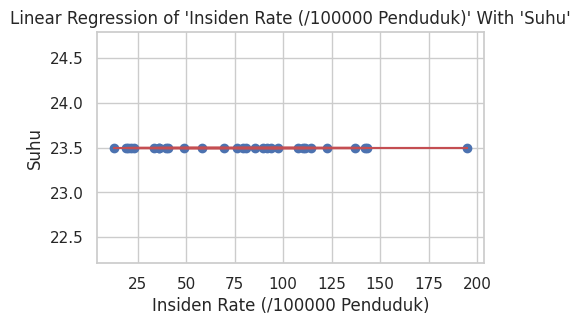



Korelasi (r): 0.00
Keragaman (r^2): 0.00
Persamaan regresi: y = 23.50 + 0.00 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'Kelembaban'



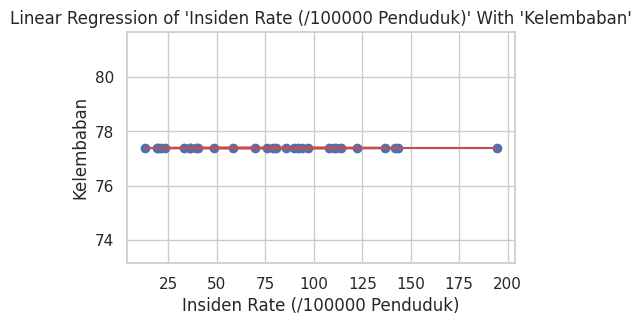



Korelasi (r): -0.00
Keragaman (r^2): 0.00
Persamaan regresi: y = 77.40 + -0.00 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'GoldarA'



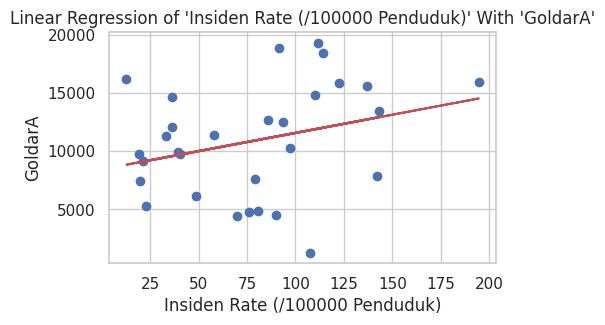



Korelasi (r): 0.29
Keragaman (r^2): 0.09
Persamaan regresi: y = 8445.12 + 31.33 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'GoldarB'



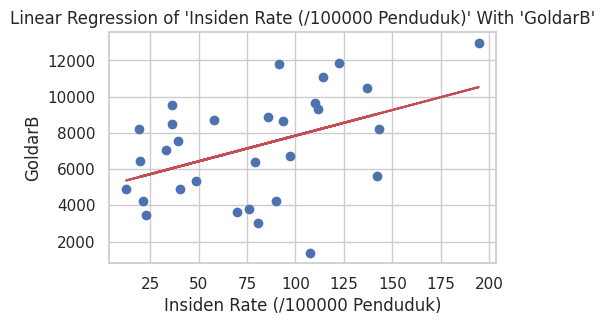



Korelasi (r): 0.43
Keragaman (r^2): 0.19
Persamaan regresi: y = 5010.36 + 28.36 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'GoldarAB'



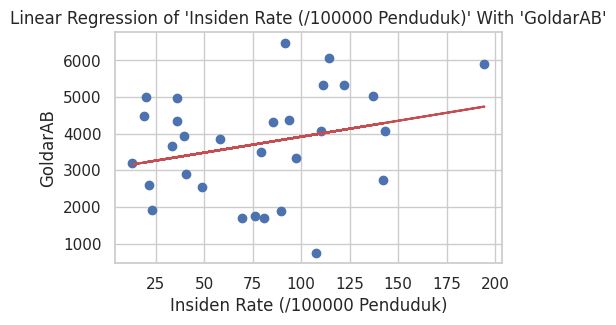



Korelasi (r): 0.27
Keragaman (r^2): 0.07
Persamaan regresi: y = 3047.53 + 8.71 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'GoldarO'



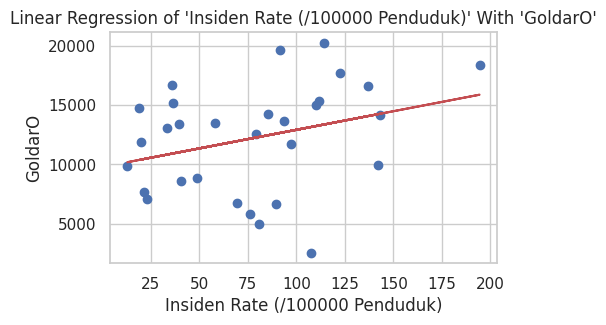



Korelasi (r): 0.31
Keragaman (r^2): 0.10
Persamaan regresi: y = 9785.17 + 31.39 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'Tamat SD'



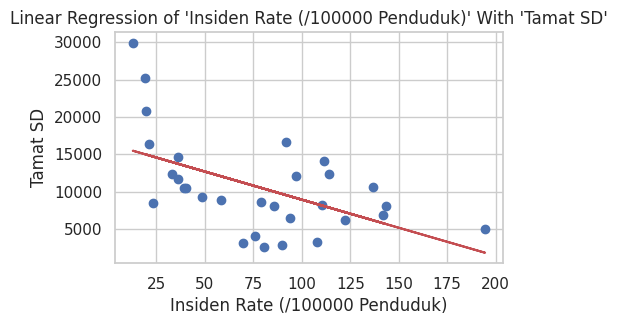



Korelasi (r): -0.53
Keragaman (r^2): 0.28
Persamaan regresi: y = 16454.44 + -75.25 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'Tamat SMP'



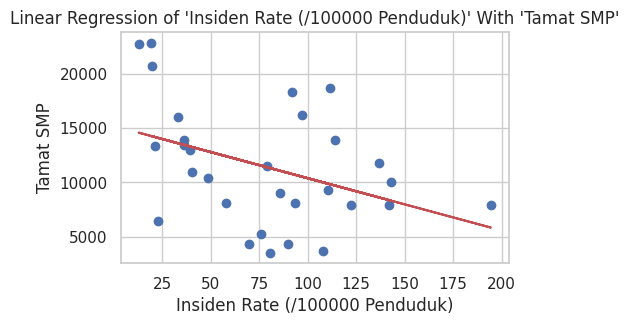



Korelasi (r): -0.40
Keragaman (r^2): 0.16
Persamaan regresi: y = 15207.91 + -48.13 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'Tamat SMA'



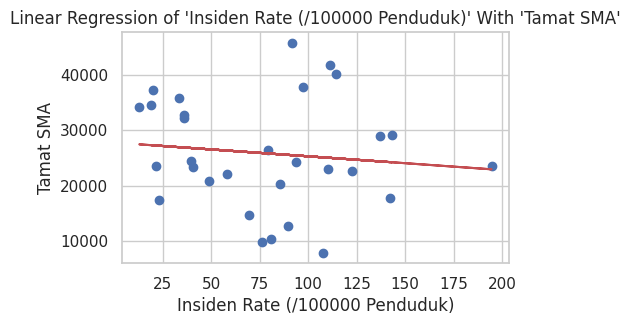



Korelasi (r): -0.11
Keragaman (r^2): 0.01
Persamaan regresi: y = 27771.70 + -24.80 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'Tamat Kuliah'



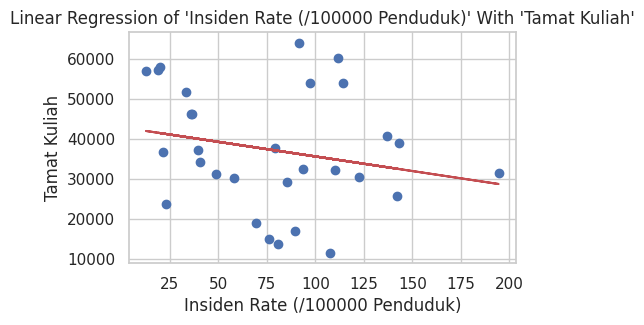



Korelasi (r): -0.22
Keragaman (r^2): 0.05
Persamaan regresi: y = 42979.61 + -72.93 x 


Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan 'Insiden Rate (/100000 Penduduk)'



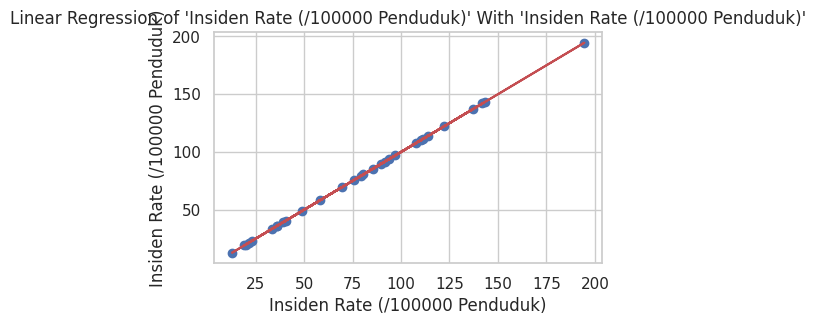



Korelasi (r): 1.00
Keragaman (r^2): 1.00
Persamaan regresi: y = 0.00 + 1.00 x 




In [ ]:
for col in dataset.columns[1:]:

  print(f"Persamaan regresi linier 'Insiden Rate (/100000 Penduduk)' dengan '{col}'\n")

  res = linregress(dataset['Insiden Rate (/100000 Penduduk)'], dataset[col])

  plt.figure(figsize=(5,3))
  plt.plot(dataset['Insiden Rate (/100000 Penduduk)'], dataset[col], 'o', label='original data')
  plt.plot(dataset['Insiden Rate (/100000 Penduduk)'], res.intercept + res.slope*dataset['Insiden Rate (/100000 Penduduk)'], 'r', label='fitted line')
  plt.title(f"Linear Regression of 'Insiden Rate (/100000 Penduduk)' With '{col}'")
  plt.xlabel("Insiden Rate (/100000 Penduduk)")
  plt.ylabel(col)
  plt.show()

  print("\n")
  print(f"Korelasi (r): {res.rvalue:.2f}")
  print(f"Keragaman (r^2): {res.rvalue**2:.2f}")
  print(f"Persamaan regresi: y = {res.intercept:.2f} + {res.slope:.2f} x ")

  print("\n==============================\n")


**Analisis Regresi Linier**

---
\
**Scatter Plot**
\
\
Scatter plot yang digunakan ditujukan untuk memvisualisasikan persamaan regresi linier antara variabel 'Insiden Rate (/100000 Penduduk)' dengan variabel lainnya yang terdapat pada dataset. Scatter plot menunjukkan pola hubungan antara kedua variabel tersebut.
\
\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan 'Jumlah Penduduk'**
Persamaan regresi linear yang dihasilkan adalah: y = 92298,86 – 152,71x yang berarti setiap peningkatan satu unit dalam ‘Jumlah Penduduk’ dihubungkan dengan penurunan sekitar 152,71 unit dalam ‘Insiden Rate (/100000 Penduduk)’. Nilai korelasi ($r$) yang dihasilkan adalah 0,23 yang menunjukkan korelasi negatif yang lemah, serta nilai keragaman ($r^{2}$) yang dihasilkan adalah 0,05 yang menunjukkan bahwa sekitar 5% dari variabel dalam ‘Insiden Rate (/100000 Penduduk)’ dapat dijelaskan oleh variable dalam ‘Jumlah Penduduk’.
\
\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘Proporsi Penduduk Laki’**
Persamaan regresi linear yang dihasilkan adalah: y = 0,51 – 0,00x yang berarti tidak ada hubungan linier yang signifikan. Nilai korelasi ($r$) yang dihasilkan adalah -0,69 yang menunjukkan adanya korelasi negatif yang cukup kuat dan peningkatan yang cenderung menurun, serta nilai keragaman ($r^{2}$) yang dihasilkan adalah 0,47 yang menunjukkan sekitar 47% dari variable dalam 'Insiden Rate (/100000 Penduduk)' dapat dijelaskan oleh variable dalam ‘Proporsi Penduduk Laki’.
\
\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘Curah Hujan’**
Persamaan regresi linear yang dihasilkan adalah: y = 192,30 + 0,00x yang berarti tidak ada hubungan linier yang signifikan. Nilai korelasi yang dihasilkan adalah 0,00 yang menunjukkan tidak ada hubungan linier, serta nilai keragaman yang dihasilkan adalah 0,00 yang menunjukkan tidak dapat digunakan sebagai predictor.
\
\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘Suhu’**
Persamaan regresi linear yang dihasilkan adalah: y = 23,50 + 0,00x yang berarti tidak ada hubungan linier yang signifikan. Nilai korelasi yang dihasilkan adalah 0,00 tidak menunjukkan hubungan linear, serta nilai keragaman yang dihasilkan adalah 0,00 yang menunjukkan tidak dapat menjelaskan variable dalam ‘Insiden Rate’ menggunakan ‘Suhu’ sebagai predictor.
\
\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘Kelembaban’**
Persamaan regresi linear yang dihasilkan adalah: y = 77,40 – 0,00x yang berarti tidak ada hubungan linier yang signifikan. Nilai korelasi yang dihasilkan adalah -0,00 yang menunjukkan bahwa tidak ada hubungan linier. Nilai keragaman yang dihasilkan adalah 0,00 tidak dapat menjelaskan variable sebagai predictor.
\
\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘GoldarA’**
Persamaan regresi linear yang dihasilkan adalah: y = 8445,12 + 31,33x yang berarti adanya hubunugan linier positif. Nilai korelasinya adalah 0,29 yang menunjukkan adanya korelasi positif yang lemah, serta nilai keragamannya adalah 0,09 yang menunjukkan sekitar 9% dari variable dapat dijelaskan.
\
\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘GoldarB’**
Persamaan regresi linier yang dihasilkan adalah: y = 5010,36 + 28,36x yang berarti adanya hubungan linier positif. Nilai korelasinya adalah 0,43 yang menunjukkan adanya korelasi positif yang lebih kuat, serta nilai keragamannya adalah 0,19 yang menunjukkan sekitar 19% dari variable dapat dijelaskan.
\
\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘GoldarAB’**
Persamaan regresi linier yang dihasilkan adalah: y = 3047,53 + 8,71x yang berarti adanya hubungan linier positif. Nilai korelasinya adalah 0,27 yang menunjukkan korelasi positif yang lemah, serta nilai keragaman 0,07 yang menunjukkan 7% dari variable dapat dijelaskan.

\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘GoldarO’**

Persamaan regresi linier yang dihasilkan adalah: y = 9785,17 + 31,39x yang berarti adanya hubungan linier positif. Nilai korelasinya adalah 0,31 yang menunjukkan korelasi positif yang lemah, serta nilai keragaman 0,10 yang menunjukkan 10% dari variable dapat dijelaskan.

\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘Tamat SD**
Persamaan regeresi linier yang dihasilkan adalah: y = 16454,44 + -75,25x yang berarti adanya hubungan linier negatif. Nilai korelasinya adalah -0,53 yang menunjukkan korelasi negatif yang kuat, serta nilai keragaman 0,28 yang menunjukkan 28% dari variable dapat dijelaskan.

\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘Tamat SMP’**
Persamaan regresi linier yang dihasilkan adalah: y = 15207,91 + -48,13x yang menunjukkan adanya hubungan linier negatif. Nilai korelasinya adalah -0,40 yang menunjukkan korelasi negatif yang lemah, serta nilai keragaman 0,16 yang menunjukkan 16% dari variable dapat dijelaskan.

\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘Tamat SMA’**
Persamaan regresi linier yang dihasilkan adalah: y = 27771,70 + -24,80x yang menunjukkan adanya hubungan linier negatif. Nilai korelasinya adalah -0,11 yang menunjukkan korelasi negatif yang lemah, serta nilai keragaman 0,01 yang menunjukkan 1% dari variable dapat dijelaskan.

\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘Tamat Kuliah’**
Persamaan regresi linier yang dihasilkan adalah: y = 42979,61 + -72,93x yang menunjukkan adanya hubungan linier negatif. Nilai korelasinya adalah -0,22 yang menunjukkan korelasi negatif yang lemah, serta nilai keragaman 0,05 yang menunjukkan 5% dari variable dapat dijelaskan.

\
**Hubungan antara 'Insiden Rate (/100000 Penduduk)' dengan ‘Insiden Rate (/100000 Penduduk)’**
Persamaan regresi linier yang dihasilkan adalah: y = 0,00 + 1,00x. Nilai korelasinya adalah 1,00 yang menunjukkan korelasi positif yang sangat kuat, serta nilai keragaman 1,00 yang menunjukkan 100% dari variable dapat dijelaskan.

\


# **6. Uji Hipotesis**

In [ ]:
for col in dataset.columns[1:-1]:
  # Deskripsi
  print(f"Pengaruh Faktor {col} Terhadap Insiden Rate")
  print(f"Membandingkan nilai tengah/rata-rata (mean) dari data {col} dengan data Insiden Rate Menggunakan Z-Test")
  print(f"Hipotesis Nol (H0): Tidak ada perbedaan signifikansi dari {col} terhadap Insiden Rate\n")

  # Dataset untuk pengujian
  column_test = dataset[col]
  insiden_rate = dataset['Insiden Rate (/100000 Penduduk)']

  # Alpha = 0.05
  alpha = 0.05

  # Z-test
  z_statistic, p_value = ztest(x1 = insiden_rate, x2 = column_test)
  z_critical = stats.norm.ppf(1 - alpha/2)

  print(f"Z-Statistic: {z_statistic}")
  print(f"P-Value (two-tailed): {p_value}")
  print(f"Z-Critical Value (two-tailed, α=0.05): {z_critical}")

  # Kesimpulan uji hipotesis
  print("\nKesimpulan uji hipotesis")

  if p_value < alpha:
      print("Tolak hipotesis nol: Ada perbedaan signifikan.")
  else:
      print("Terima hipotesis nol: Tidak ada perbedaan signifikan.")

  print("\n====================\n")

Pengaruh Faktor Jumlah Penduduk Terhadap Insiden Rate
Membandingkan nilai tengah/rata-rata (mean) dari data Jumlah Penduduk dengan data Insiden Rate Menggunakan Z-Test
Hipotesis Nol (H0): Tidak ada perbedaan signifikansi dari Jumlah Penduduk terhadap Insiden Rate

Z-Statistic: -14.564264554927881
P-Value (two-tailed): 4.740587883174378e-48
Z-Critical Value (two-tailed, α=0.05): 1.959963984540054

Kesimpulan uji hipotesis
Tolak hipotesis nol: Ada perbedaan signifikan.


Pengaruh Faktor Proporsi Penduduk Laki Terhadap Insiden Rate
Membandingkan nilai tengah/rata-rata (mean) dari data Proporsi Penduduk Laki dengan data Insiden Rate Menggunakan Z-Test
Hipotesis Nol (H0): Tidak ada perbedaan signifikansi dari Proporsi Penduduk Laki terhadap Insiden Rate

Z-Statistic: 9.327823236608966
P-Value (two-tailed): 1.0806745234877144e-20
Z-Critical Value (two-tailed, α=0.05): 1.959963984540054

Kesimpulan uji hipotesis
Tolak hipotesis nol: Ada perbedaan signifikan.


Pengaruh Faktor Curah Hujan Terh

**Analisis Uji Hipotesis**

---

*   Klaim bahwa tidak ada perbedaan signifikansi dari Jumlah Penduduk terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti jumlah penduduk memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari Proporsi Penduduk Laki terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti Proporsi Penduduk Laki memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari Curah Hujan terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti Curah Hujan memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari Suhu terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti Suhu memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari Kelembaban terhadap Insiden Rate adalah benar. Hal ini berarti Kelembaban memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari GoldarA terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti GoldarA memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari GoldarB terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti GoldarB memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari GoldarAB terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti GoldarAB memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari GoldarO terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti GoldarO memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari Tamat SD terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti Tamat SD memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari Tamat SMP terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti Tamat SMP memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari Tamat SMA terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti Tamat SMA memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.
*   Klaim bahwa tidak ada perbedaan signifikansi dari Tamat Kuliah terhadap Insiden Rate tidaklah benar. Terdapat bukti untuk menolak H0, hal ini berarti Tamat Kuliah memiliki perbedaan signifikan terhadap insiden rate pada signifikansi 5%.

\

**Kesimpulan dari analisis uji hipotesis adalah:**


1.   Berbagai faktor yang diuji menunjukkan adanya perbedaan yang signifikan terhadap insiden rate pada tingkat signifikansi 5%. Ini berarti variabel-variabel tersebut berperan peran penting dalam mempengaruhi insiden rate.
2.   Saat membandingkan insiden rate dengan dirinya sendiri, tidak ditemukan bukti yang mendukung adanya perbedaan signifikan. Dengan kata lain, insiden rate tidak menunjukkan perbedaan yang signifikan terhadap dirinya sendiri pada tingkat signifikansi 5%.



# **7. Peluang/Probabilitas Dengan Peubah Acak Diskrit**


Distribusi Jumlah Penduduk di Setiap Kategori Jumlah Penduduk:
Jumlah Penduduk Category
0-50k         165889
50k-100k     1400224
100k-150k     846345
150k+              0
Name: Jumlah Penduduk, dtype: int64

Probabilitas Jumlah Penduduk di Setiap Kategori Jumlah Penduduk:
Jumlah Penduduk Category
0-50k       0.06876
50k-100k    0.58041
100k-150k   0.35082
150k+       0.00000
Name: Jumlah Penduduk, dtype: float64



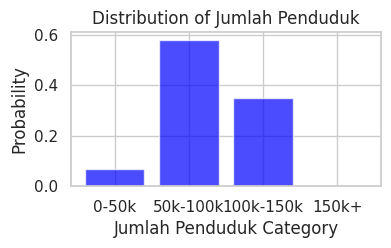



Distribusi Jumlah Penduduk di Setiap Kategori Proporsi Penduduk Laki:
Proporsi Penduduk Laki Category
0-25%            0
25-50%       70943
50-75%     2341515
75-100%          0
Name: Jumlah Penduduk, dtype: int64

Probabilitas Jumlah Penduduk di Setiap Kategori Proporsi Penduduk Laki:
Proporsi Penduduk Laki Category
0-25%     0.00000
25-50%    0.02941
50-75%    0.97059
75-100%   0.00000
Name: Jumlah Penduduk, dtype: float64



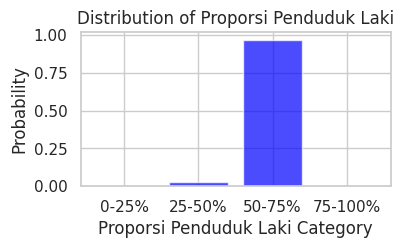



Distribusi Jumlah Penduduk di Setiap Kategori GoldarA:
GoldarA Category
0-5k       165889
5k-10k     739308
10k-15k    777738
15k+       729523
Name: Jumlah Penduduk, dtype: int64

Probabilitas Jumlah Penduduk di Setiap Kategori GoldarA:
GoldarA Category
0-5k      0.06876
5k-10k    0.30645
10k-15k   0.32238
15k+      0.30240
Name: Jumlah Penduduk, dtype: float64



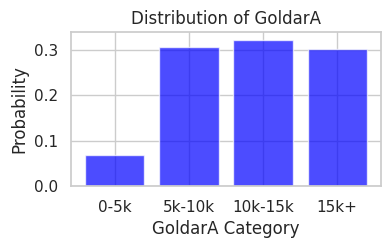



Distribusi Jumlah Penduduk di Setiap Kategori GoldarB:
GoldarB Category
0-5k        506121
5k-10k     1426826
10k-15k     479511
15k+             0
Name: Jumlah Penduduk, dtype: int64

Probabilitas Jumlah Penduduk di Setiap Kategori GoldarB:
GoldarB Category
0-5k      0.20979
5k-10k    0.59144
10k-15k   0.19876
15k+      0.00000
Name: Jumlah Penduduk, dtype: float64



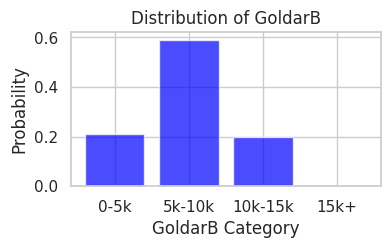



Distribusi Jumlah Penduduk di Setiap Kategori GoldarAB:
GoldarAB Category
0-5k       1815432
5k-10k      597026
10k-15k          0
15k+             0
Name: Jumlah Penduduk, dtype: int64

Probabilitas Jumlah Penduduk di Setiap Kategori GoldarAB:
GoldarAB Category
0-5k      0.75252
5k-10k    0.24748
10k-15k   0.00000
15k+      0.00000
Name: Jumlah Penduduk, dtype: float64



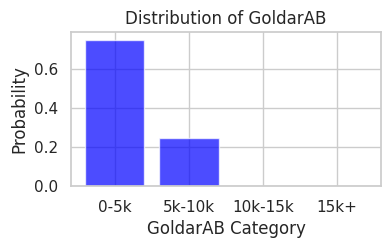



Distribusi Jumlah Penduduk di Setiap Kategori GoldarO:
GoldarO Category
0-5k        53919
5k-10k     577586
10k-15k    990207
15k+       790746
Name: Jumlah Penduduk, dtype: int64

Probabilitas Jumlah Penduduk di Setiap Kategori GoldarO:
GoldarO Category
0-5k      0.02235
5k-10k    0.23942
10k-15k   0.41046
15k+      0.32778
Name: Jumlah Penduduk, dtype: float64



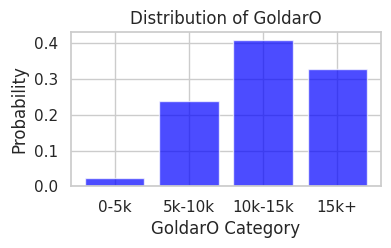



Distribusi Jumlah Penduduk di Setiap Kategori Tamat SD:
Tamat SD Category
0-10k       938489
10k-20k    1089790
20k-30k     384179
30k+             0
Name: Jumlah Penduduk, dtype: int64

Probabilitas Jumlah Penduduk di Setiap Kategori Tamat SD:
Tamat SD Category
0-10k     0.38902
10k-20k   0.45173
20k-30k   0.15925
30k+      0.00000
Name: Jumlah Penduduk, dtype: float64



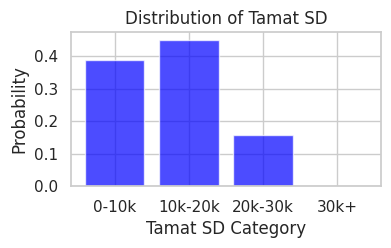



Distribusi Jumlah Penduduk di Setiap Kategori Tamat SMP:
Tamat SMP Category
0-10k       717287
10k-20k    1310992
20k-30k     384179
30k+             0
Name: Jumlah Penduduk, dtype: int64

Probabilitas Jumlah Penduduk di Setiap Kategori Tamat SMP:
Tamat SMP Category
0-10k     0.29733
10k-20k   0.54343
20k-30k   0.15925
30k+      0.00000
Name: Jumlah Penduduk, dtype: float64



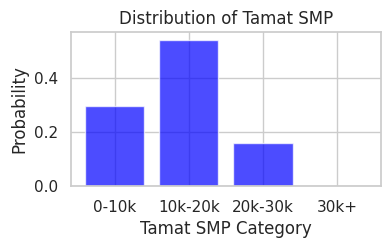



Distribusi Jumlah Penduduk di Setiap Kategori Tamat SMA:
Tamat SMA Category
0-10k        62314
10k-20k     213351
20k-30k     997643
30k+       1139150
Name: Jumlah Penduduk, dtype: int64

Probabilitas Jumlah Penduduk di Setiap Kategori Tamat SMA:
Tamat SMA Category
0-10k     0.02583
10k-20k   0.08844
20k-30k   0.41354
30k+      0.47219
Name: Jumlah Penduduk, dtype: float64



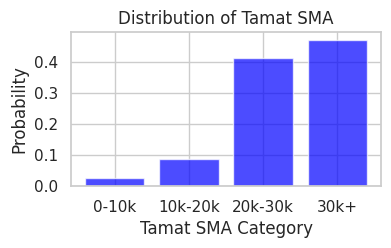



Distribusi Jumlah Penduduk di Setiap Kategori Tamat Kuliah:
Tamat Kuliah Category
0-10k            0
10k-20k     165889
20k-30k     182200
30k+       2064369
Name: Jumlah Penduduk, dtype: int64

Probabilitas Jumlah Penduduk di Setiap Kategori Tamat Kuliah:
Tamat Kuliah Category
0-10k     0.00000
10k-20k   0.06876
20k-30k   0.07552
30k+      0.85571
Name: Jumlah Penduduk, dtype: float64



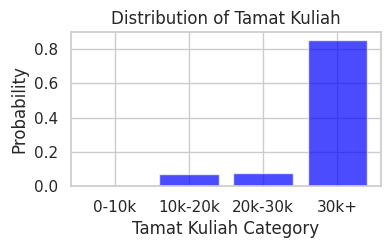



Distribusi Jumlah Penduduk di Setiap Kategori Insiden Rate (/100000 Penduduk):
Insiden Rate (/100000 Penduduk) Category
0-50       1033642
51-100      663153
101-150     644720
150+         70943
Name: Jumlah Penduduk, dtype: int64

Probabilitas Jumlah Penduduk di Setiap Kategori Insiden Rate (/100000 Penduduk):
Insiden Rate (/100000 Penduduk) Category
0-50      0.42846
51-100    0.27489
101-150   0.26725
150+      0.02941
Name: Jumlah Penduduk, dtype: float64



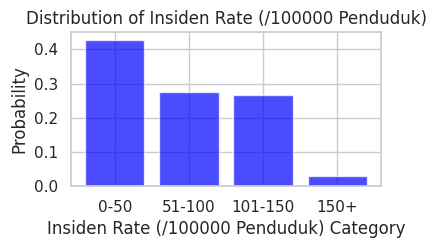

In [ ]:
# Mendefinisikan bins untuk penduduk
bins_penduduk = [0, 50000, 100000, 150000, np.inf]
labels_penduduk = ['0-50k', '50k-100k', '100k-150k', '150k+']

bins_proporsi_penduduk_laki = [0, 0.25, 0.5, 0.75, 1]
labels_proporsi_penduduk_laki = ['0-25%', '25-50%', '50-75%', '75-100%']

# Mendefinisikan bins untuk golongan darah (GoldarA, GoldarB, GoldarAB, GoldarO)
bins_goldar = [0, 5000, 10000, 15000, np.inf]
labels_goldar = ['0-5k', '5k-10k', '10k-15k', '15k+']

# Mendefinisikan bins untuk tingkat pendidikan (Tamat SD, Tamat SMP, Tamat SMA, Tamat Kuliah)
bins_education = [0, 10000, 20000, 30000, np.inf]
labels_education = ['0-10k', '10k-20k', '20k-30k', '30k+']

# Mendefinisikan bins untuk insiden rate (/100000 Penduduk)
bins_insiden_rate = [0, 50, 100, 150, np.inf]
labels_insiden_rate = ['0-50', '51-100', '101-150', '150+']

# Menerapkan bins
dataset['Jumlah Penduduk Category'] = pd.cut(dataset['Jumlah Penduduk'], bins=bins_penduduk, labels=labels_penduduk, right=False)
dataset['Proporsi Penduduk Laki Category'] = pd.cut(dataset['Proporsi Penduduk Laki'], bins=bins_proporsi_penduduk_laki, labels=labels_proporsi_penduduk_laki, right=False)
dataset['GoldarA Category'] = pd.cut(dataset['GoldarA'], bins=bins_goldar, labels=labels_goldar, right=False)
dataset['GoldarB Category'] = pd.cut(dataset['GoldarB'], bins=bins_goldar, labels=labels_goldar, right=False)
dataset['GoldarAB Category'] = pd.cut(dataset['GoldarAB'], bins=bins_goldar, labels=labels_goldar, right=False)
dataset['GoldarO Category'] = pd.cut(dataset['GoldarO'], bins=bins_goldar, labels=labels_goldar, right=False)
dataset['Tamat SD Category'] = pd.cut(dataset['Tamat SD'], bins=bins_education, labels=labels_education, right=False)
dataset['Tamat SMP Category'] = pd.cut(dataset['Tamat SMP'], bins=bins_education, labels=labels_education, right=False)
dataset['Tamat SMA Category'] = pd.cut(dataset['Tamat SMA'], bins=bins_education, labels=labels_education, right=False)
dataset['Tamat Kuliah Category'] = pd.cut(dataset['Tamat Kuliah'], bins=bins_education, labels=labels_education, right=False)
dataset['Insiden Rate (/100000 Penduduk) Category'] = pd.cut(dataset['Insiden Rate (/100000 Penduduk)'], bins=bins_insiden_rate, labels=labels_insiden_rate, right=False)

# Menghitung distribusi dan probabilitas
variable_categories = ['Jumlah Penduduk', 'Proporsi Penduduk Laki', 'GoldarA', 'GoldarB', 'GoldarAB', 'GoldarO', 'Tamat SD', 'Tamat SMP', 'Tamat SMA', 'Tamat Kuliah', 'Insiden Rate (/100000 Penduduk)']

for category in variable_categories:
    column_name = f'{category} Category'
    distribution = dataset.groupby(column_name)['Jumlah Penduduk'].sum()
    probability = distribution / distribution.sum()

    print(f"\nDistribusi Jumlah Penduduk di Setiap Kategori {category}:")
    print(distribution)

    print(f"\nProbabilitas Jumlah Penduduk di Setiap Kategori {category}:")
    print(probability)

    print()
    # Visualisasi distribusi (histogram)
    plt.figure(figsize=(4, 2))
    plt.bar(probability.index.astype(str), probability, color='blue', alpha=0.7)
    plt.title(f'Distribution of {category}')
    plt.xlabel(f'{category} Category')
    plt.ylabel('Probability')
    plt.show()

    print("\n==============================")

**Analisis Peluang**

---

**Jumlah Penduduk terhadap Jumlah Penduduk**
Distribusi: Mayoritas kecamatan memiliki jumlah penduduk dalam kategori 50k-100k, diikuti oleh 100k-150k, dan 0-50k. Tidak ada kecamatan dengan jumlah penduduk di atas 150k.
Probabilitas: Sekitar 58% kecamatan memiliki jumlah penduduk antara 50k-100k, diikuti oleh 35% dengan jumlah penduduk 100k-150k. Probabilitas kecamatan dengan jumlah penduduk di bawah 50k atau di atas 150k adalah rendah.
\
\
**Jumlah Penduduk terhadap Proporsi Penduduk Laki**
Distribusi: Mayoritas kecamatan memiliki proporsi penduduk laki-laki antara 50-75%.
Probabilitas: Probabilitas kecamatan dengan proporsi penduduk laki-laki antara 50-75% sangat tinggi (sekitar 97%), sedangkan kecamatan dengan proporsi di luar rentang tersebut memiliki probabilitas rendah.
\
\
**Jumlah Penduduk terhadap Golongan Darah A (GoldarA)**
Distribusi: Distribusi jumlah penduduk kecamatan cukup merata pada kategori GoldarA.
Probabilitas: Probabilitas kecamatan dengan jumlah penduduk 5k-10k dan 10k-15k hampir setara, sedangkan probabilitas kecamatan dengan jumlah penduduk di bawah 5k atau di atas 15k lebih rendah.
\
\
**Jumlah Penduduk terhadap Golongan Darah B (GoldarB)**
Distribusi: Distribusi jumlah penduduk kecamatan cenderung tinggi pada kategori 5k-10k.
Probabilitas: Probabilitas kecamatan dengan jumlah penduduk 5k-10k paling tinggi (sekitar 59%), diikuti oleh kecamatan dengan jumlah penduduk 10k-15k (sekitar 20%).
\
\
**Jumlah Penduduk terhadap Golongan Darah AB (GoldarAB)**
Distribusi: Sebagian besar kecamatan memiliki jumlah penduduk terbanyak pada kategori 0-5k untuk GoldarAB.
Probabilitas: Probabilitas kecamatan dengan jumlah penduduk 0-5k pada GoldarAB adalah sekitar 75%, sedangkan probabilitas kecamatan dengan jumlah penduduk 5k-10k adalah sekitar 25%.
\
\
**Jumlah Penduduk terhadap Golongan Darah O (GoldarO)**
Distribusi: Mayoritas kecamatan memiliki jumlah penduduk di kategori 10k-15k pada GoldarO.
Probabilitas: Probabilitas kecamatan dengan jumlah penduduk 10k-15k pada GoldarO paling tinggi (sekitar 41%), diikuti oleh kategori 15k+ (sekitar 33%).
\
\
**Jumlah Penduduk terhadap Tamat SD**
Distribusi: Mayoritas kecamatan memiliki jumlah penduduk terbanyak pada kategori 0-10k untuk Tamat SD.
Probabilitas: Probabilitas kecamatan dengan jumlah penduduk 0-10k pada Tamat SD adalah sekitar 39%, diikuti oleh kategori 10k-20k (sekitar 45%).
\
\
**Jumlah Penduduk terhadap Tamat SMP**
Distribusi: Mayoritas kecamatan memiliki jumlah penduduk terbanyak pada kategori 10k-20k untuk Tamat SMP.
Probabilitas: Probabilitas kecamatan dengan jumlah penduduk 10k-20k pada Tamat SMP adalah sekitar 54%, diikuti oleh kategori 0-10k (sekitar 30%).
\
\
**Jumlah Penduduk terhadap Tamat SMA**
Distribusi: Mayoritas kecamatan memiliki jumlah penduduk terbanyak pada kategori 30k+ untuk Tamat SMA.
Probabilitas: Probabilitas kecamatan dengan jumlah penduduk 30k+ pada Tamat SMA adalah sekitar 47%, diikuti oleh kategori 20k-30k (sekitar 41%).
\
\
**Jumlah Penduduk terhadap Tamat Kuliah**
Distribusi: Mayoritas kecamatan memiliki jumlah penduduk terbanyak pada kategori 30k+ untuk Tamat Kuliah.
Probabilitas: Probabilitas kecamatan dengan jumlah penduduk 30k+ pada Tamat Kuliah adalah sekitar 86%, sementara kategori 10k-20k memiliki probabilitas sekitar 7%.
\
\
**Jumlah Penduduk terhadap Insiden Rate (/100000 Penduduk)**
Distribusi: Mayoritas kecamatan memiliki jumlah penduduk terbanyak pada kategori 0-50 untuk Insiden Rate (/100000 Penduduk).
Probabilitas: Probabilitas kecamatan dengan jumlah penduduk 0-50 pada Insiden Rate (/100000 Penduduk) adalah sekitar 43%, diikuti oleh kategori 51-100 (sekitar 27%).

